# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("/content/car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.drop_duplicates()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19807.086132,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8119.836852,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,41097.250000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
iqr = df.Mileage.quantile(0.75) - df.Mileage.quantile(0.25)
upperthreshold = df.Mileage.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Mileage.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(41097.25, -1260.75)

In [ ]:
df.Mileage = df.Mileage.clip(-1260.75, 41097.25)

In [ ]:
iqr = df.Cylinder.quantile(0.75) - df.Cylinder.quantile(0.25)
upperthreshold = df.Cylinder.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Cylinder.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(9.0, 1.0)

In [ ]:
iqr = df.Liter.quantile(0.75) - df.Liter.quantile(0.25)
upperthreshold = df.Liter.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Liter.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(6.199999999999999, -0.1999999999999993)

In [ ]:
iqr = df.Doors.quantile(0.75) - df.Doors.quantile(0.25)
upperthreshold = df.Doors.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Doors.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(4.0, 4.0)

In [ ]:
iqr = df.Cruise.quantile(0.75) - df.Cruise.quantile(0.25)
upperthreshold = df.Cruise.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Cruise.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(1.0, 1.0)

In [ ]:
iqr = df.Sound.quantile(0.75) - df.Sound.quantile(0.25)
upperthreshold = df.Sound.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Sound.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(2.5, -1.5)

In [ ]:
iqr = df.Leather.quantile(0.75) - df.Leather.quantile(0.25)
upperthreshold = df.Leather.quantile(0.75) + (1.5*iqr)
lowerthreshold = df.Leather.quantile(0.25) - (1.5*iqr)
upperthreshold,lowerthreshold

(2.5, -1.5)

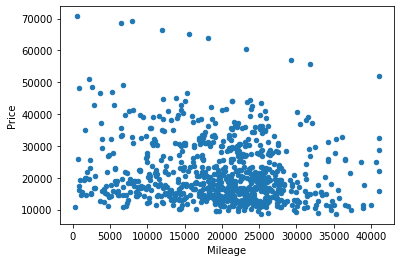

In [ ]:
df.plot.scatter(x ='Mileage', y = 'Price')

In [ ]:
df[['Price', 'Mileage']].corr()

,Price,Mileage
Price,1.000000,-0.146283
Mileage,-0.146283,1.000000


In [ ]:
df['transformed'] = np.power(df['Mileage'],3)

In [ ]:
df[['Price', 'transformed']].corr()

,Price,transformed
Price,1.000000,-0.099925
transformed,-0.099925,1.000000


In [ ]:
df['transformed_1'] = np.exp(df['Mileage'])
df[['Price', 'transformed_1']].corr()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Price,transformed_1
Price,1.0,-0.0
transformed_1,-0.0,NaN


In [ ]:
#There is no linear relationship with price and Mileage even after transformation. 
#Hence this feature is dropped.

In [ ]:
df.drop(['transformed', 'transformed_1'], axis = 1, inplace = True)

In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979.0,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


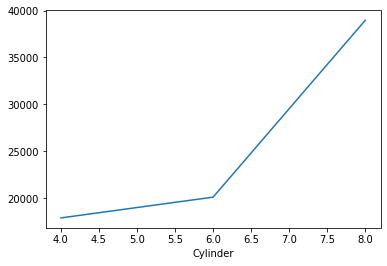

In [ ]:
df.groupby('Cylinder')['Price'].mean().plot()

In [ ]:
df[['Cylinder', 'Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


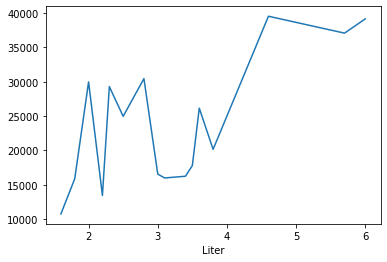

In [ ]:
df.groupby('Liter')['Price'].mean().plot()

In [ ]:
df[['Liter', 'Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


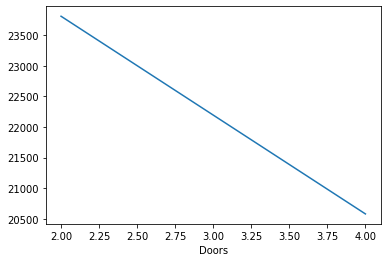

In [ ]:
df.groupby('Doors')['Price'].mean().plot()

In [ ]:
df[['Doors', 'Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df['Tran_Doors'] = np.log(df['Doors'])
df[['Tran_Doors', 'Price']].corr()

,Tran_Doors,Price
Tran_Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df['tran1doors'] = np.power(df['Doors'],2)
df[['tran1doors', 'Price']].corr()

,tran1doors,Price
tran1doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
#we have tried all transformed here there is no relationship between doors and price
#so we should drop the feature

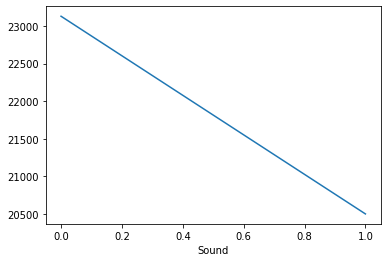

In [ ]:
df.groupby('Sound')['Price'].mean().plot()

In [ ]:
df[['Sound', 'Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
df['Tran_sound'] = np.log(df['Sound'])
df[['Tran_sound', 'Price']].corr()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Tran_sound,Price
Tran_sound,NaN,NaN
Price,NaN,1.0


In [ ]:
df['Transound'] = np.power(df['Sound'],2)
df[['Transound', 'Price']].corr()

,Transound,Price
Transound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
#we have tried all transformed here there is no relationship between sound and price
#so we should drop the feature

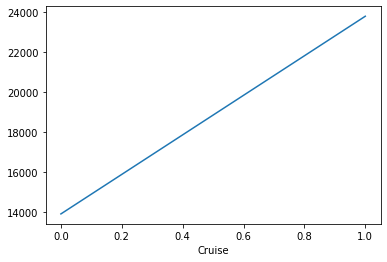

In [ ]:
df.groupby('Cruise')['Price'].mean().plot()

In [ ]:
df[['Cruise', 'Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


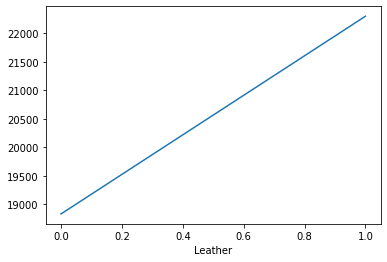

In [ ]:
df.groupby('Leather')['Price'].mean().plot()

In [ ]:
df[['Leather', 'Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
df['Transl'] = np.power(df['Leather'],3)
df[['Transl', 'Price']].corr()

,Transl,Price
Transl,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
df['Transl1'] = np.log(df['Leather'])
df[['Transl1', 'Price']].corr()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Transl1,Price
Transl1,NaN,NaN
Price,NaN,1.0


In [ ]:
#we have tried all transformed here there is no relationship between leather and price
#so we should drop the feature

In [ ]:
#1. Use mileage, cylinders, liters, doors, cruise, sound, and leather 
#to find the linear regression equation.
#but here we should use only cylinders,liters,cruise are  only have relation between price

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Cylinder', 'Liter', 'Cruise', ]].values
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
reg.coef_

array([3386.46057516,  722.54566176, 2719.26046218])

In [ ]:
coef_df = pd.DataFrame(reg.coef_,['Cylinder', 'Liter', 'Cruise', ], columns=['Coefficient'])
coef_df

,Coefficient
Cylinder,3386.460575
Liter,722.545662
Cruise,2719.260462


In [ ]:
reg.intercept_

21069.76532436093

In [ ]:
y_predict = reg.predict(X_test_scaled)

In [ ]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
0,14220.013215,19034.872121
1,22358.877678,24829.315269
2,21536.741730,24960.438694
3,19540.244789,24763.753556
4,21956.342663,24960.438694
...,...,...
237,15554.283129,24960.438694
238,14202.997153,12762.432067
239,11013.871368,18641.501844
240,9720.978890,18641.501844


In [ ]:
from sklearn import metrics
reg.score(X_test, y_test)

-3.2970742131466473

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Tran_Doors',
       'tran1doors', 'Tran_sound', 'Transound', 'Transl', 'Transl1'],
      dtype='object')

In [ ]:
df.drop(['Tran_Doors', 'tran1doors', 'Tran_sound', 'Transound', 'Transl', 'Transl1'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Se

In [ ]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Sedan 4D',
       'Trim_Conv 2D', 'Trim_Coupe 2D', 'Trim_Custom Sedan 4D',
       'Trim_DHS Sedan 4D', 'Trim_DTS Sedan 4D', 'Trim_GT Coupe 2D',
       'Trim_GT Sedan 4D', 'Trim_GT Sportwagon', 'Trim_GTP Sedan 4D',
       'Trim_GXP Sedan 4D', 'Trim_Hardtop Conv 2D', 'Trim_L300 Sedan 4D',
       'Trim_LS Coupe 2D', 'Trim_LS Hatchback 4D', 'Trim_LS MAXX Hback 4D',
       'Trim_LS Sedan 4D', 'Trim_LS Sport Coupe 2D', 'Trim_LS Sport Sedan 4D',
       'Trim_LT Coupe 2D', 'Trim_LT Hatchback 4D', 'Trim_LT MAXX Hback 4D',
       'Trim_LT Sedan 4D', 'Trim_Limited Sedan 4D', 'Trim_Linear Conv 2D',
       'Trim_Linear Sedan 4D', 'Trim_Linear Wagon 4D', 'Trim_MAXX Hback 4D',
       'Trim_Quad Coupe 2D', 'Trim_SE Sedan 4D', 'Trim_SLE Sedan 4D',
       'Trim_SS Coupe 2D', 'Trim_SS Sedan 4D', 'Trim_SVM Hatchback 4D',
       'Trim_SVM Sedan 4D', 'Trim_Sedan 4D', 'Trim_Special Ed Ultra 4D',
       'Trim_Sportwagon 4D', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']].values
y = df['Price'].values

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
reg.coef_

array([-1.48390373e+03, -4.67814031e+15,  6.14026300e+15,  1.14748309e+16,
        4.85072373e+01,  8.97210506e+01,  1.55545992e+02,  2.30473284e+16,
        4.86743576e+15, -1.06121472e+16,  2.93055407e+15,  1.17513538e+16,
       -1.62430540e+16, -2.86919746e+15, -2.47466421e+15, -8.22374136e+15,
       -6.73649057e+15, -6.36288855e+15, -3.34447786e+15, -1.98305235e+16,
       -7.30830120e+15, -6.20564163e+15, -4.37341044e+15, -1.39892274e+16,
       -2.13520123e+15, -4.37341044e+15, -4.06767186e+15, -8.65814852e+15,
       -7.52770560e+15, -5.35487765e+15, -1.29617051e+16, -8.28610888e+15,
       -3.77584772e+15,  5.05780785e+15,  6.80986598e+15, -2.99311334e+16,
        5.64577791e+15, -4.46956021e+15, -3.61463500e+15, -1.97562540e+16,
       -6.73482248e+15, -6.16121332e+15, -5.13839557e+15, -2.16786262e+16,
        6.34856492e+15,  1.48072125e+16,  2.07782389e+15, -3.98012800e+15,
        3.20941836e+15,  2.07782389e+15, -3.35928070e+15,  2.93241824e+15,
        5.34636536e+15,  

In [ ]:
coef_df = pd.DataFrame(reg.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Sedan 4D',
       'Trim_Conv 2D', 'Trim_Coupe 2D', 'Trim_Custom Sedan 4D',
       'Trim_DHS Sedan 4D', 'Trim_DTS Sedan 4D', 'Trim_GT Coupe 2D',
       'Trim_GT Sedan 4D', 'Trim_GT Sportwagon', 'Trim_GTP Sedan 4D',
       'Trim_GXP Sedan 4D', 'Trim_Hardtop Conv 2D', 'Trim_L300 Sedan 4D',
       'Trim_LS Coupe 2D', 'Trim_LS Hatchback 4D', 'Trim_LS MAXX Hback 4D',
       'Trim_LS Sedan 4D', 'Trim_LS Sport Coupe 2D', 'Trim_LS Sport Sedan 4D',
       'Trim_LT Coupe 2D', 'Trim_LT Hatchback 4D', 'Trim_LT MAXX Hback 4D',
       'Trim_LT Sedan 4D', 'Trim_Limited Sedan 4D', 'Trim_Linear Conv 2D',
       'Trim_Linear Sedan 4D', 'Trim_Linear Wagon 4D', 'Trim_MAXX Hback 4D',
       'Trim_Quad Coupe 2D', 'Trim_SE Sedan 4D', 'Trim_SLE Sedan 4D',
       'Trim_SS Coupe 2D', 'Trim_SS Sedan 4D', 'Trim_SVM Hatchback 4D',
       'Trim_SVM Sedan 4D', 'Trim_Sedan 4D', 'Trim_Special Ed Ultra 4D',
       'Trim_Sportwagon 4D', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'], columns = ['coefficient'])
coef_df

,coefficient
Mileage,-1.483904e+03
Cylinder,-4.678140e+15
Liter,6.140263e+15
Doors,1.147483e+16
Cruise,4.850724e+01
...,...
Type_Convertible,1.595529e+15
Type_Coupe,4.127690e+15
Type_Hatchback,-2.928349e+16
Type_Sedan,9.959319e+15


In [ ]:
reg.intercept_

21030.1816351038

In [ ]:
y_predict = reg.predict(X_test)
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
0,33220.028446,33222.681635
1,34355.003728,32926.681635
2,34739.214960,35166.681635
3,11080.516378,10153.681635
4,16341.804099,16294.681635
...,...,...
237,14702.798320,15234.681635
238,23329.208256,23702.181635
239,14997.884336,16396.681635
240,39092.189918,38142.681635


In [ ]:
reg.score(X_test, y_test)

0.9900099806145116